In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [2]:
africa = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2026/2026-01-13/africa.csv")

In [3]:
africa

,language,family,native_speakers,country
0,ǂKxʼaoǁʼae,Kxʼa,5000,Namibia
1,ǂKxʼaoǁʼae,Kxʼa,5000,Botswana
2,Abon,Niger–Congo,800,Cameroon
3,Abron,Niger–Congo,1393000,Ghana
4,Abron,Niger–Congo,1393000,Ivory Coast
...,...,...,...,...
791,Zemba,Niger–Congo,25000,Angola
792,Zemba,Niger–Congo,25000,Namibia
793,Zhire,Niger–Congo,11000,Nigeria
794,Zhoa,Niger–Congo,2000,Cameroon


In [4]:
africa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   language         796 non-null    object
 1   family           796 non-null    object
 2   native_speakers  796 non-null    int64 
 3   country          796 non-null    object
dtypes: int64(1), object(3)
memory usage: 25.0+ KB


In [5]:
africa["family"].unique()

array(['Kxʼa', 'Niger–Congo', 'Afroasiatic', 'Indo-European',
       'Nilo-Saharan', 'Mande', 'Portuguese', 'Khoe–Kwadi',
       'Afro-Asiatic', 'Arabic-based', 'Kongo-based', 'English',
       'Austronesian', 'French', 'Ubangian', 'Language', 'Tuu'],
      dtype=object)

* "Afroasiatic" and "Afro-Asiatic" refer to the same language family and can be used interchangeably. 
* Shabo Language isolate or possible Nilo-Saharan Native to Ethiopia.

In [6]:
# Replace values
africa.replace(["Afro-Asiatic", "Language"], ["Afroasiatic", "Language isolate"], inplace=True)

In [7]:
# Data aggregation 
df = africa.groupby("family").agg(
    num_language=("language", "nunique"),
    sum_native_speakers=("native_speakers", "sum"),
    num_country=("country", "nunique")
).reset_index()

In [8]:
# Values to include in the subtitle
total_family = africa["family"].nunique()
total_language = africa["language"].nunique()
total_country = africa["country"].nunique()
total_speakers = africa["native_speakers"].sum()
billion_speakers = total_speakers/1e9

In [9]:
# Percentage columns
df["language_perc"] = (df["num_language"] / total_language)*100
df["speakers_perc"] = (df["sum_native_speakers"] / total_speakers)*100
df["country_perc"] = (df["num_country"] / total_country)*100

In [10]:
# Select the top 3 rows and set index
df = df.sort_values("country_perc", ascending=False).reset_index(drop=True).head(3)
df = df[["family", "language_perc","speakers_perc","country_perc"]]
df = df.set_index("family")

In [11]:
df

,language_perc,speakers_perc,country_perc
family,,,
Niger–Congo,76.294821,33.947689,80.392157
Afroasiatic,4.183267,59.474114,39.215686
Nilo-Saharan,13.944223,2.787011,37.254902


In [12]:
# Custom font
font_path = "Afrika Safari Rebuild St.ttf"
font = FontProperties(fname=font_path)

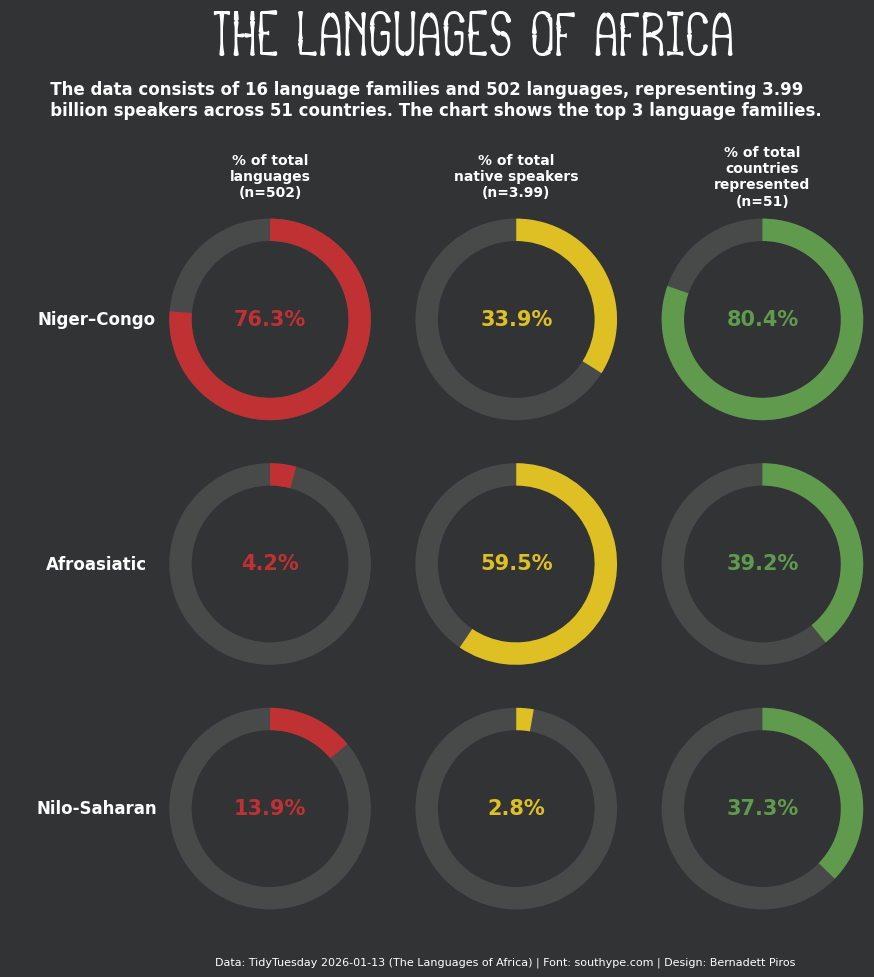

In [13]:
# Colors for each column 
colors = ["#BF3133", "#DFC024", "#609A4D"]

# Create a 3x3 polar subplots 
fig, axs = plt.subplots(3, 3, figsize=(9,9), subplot_kw={"polar": True}, facecolor="#313334")

# Loop through each row 
for i, (index, data) in enumerate(df.iterrows()):
    # Loop through each column in the row
    for j, (label, content) in enumerate(data.items()):
        # Select ith row, jth column
        ax = axs[i, j]        

        # Theta=0 at the top
        ax.set_theta_zero_location("N")
        # Theta increasing clockwise
        ax.set_theta_direction(-1)
        
        # Plot the last ring as background grey circle
        ax.barh(len(df)-1, 2 * np.pi, color="grey", alpha=0.3, height=0.5)
        
        # Convert percentage to angle
        angle = content * 2 * np.pi / 100  
        
        # Plot the colored bar
        ax.barh(len(df)-1, angle, color=colors[j], height=0.5)  
        
        # Add text in the center of each subplot
        ax.text(angle / 2, 0, f"{content:.1f}%", color=colors[j], weight="bold", 
                fontsize=15, ha="center", va="center")                

        # Turn off the axis
        ax.axis("off")

        # Plot the index label in a single column in front of each row
        if j == 0:  
            ax.text(-0.35, 0.5, f"{index}", transform=ax.transAxes, color="white",
                    fontsize=12, weight="bold", ha="center", va="center")

# List of titles for the columns
titles = [f"% of total\nlanguages\n(n={total_language})", f"% of total\nnative speakers\n(n={billion_speakers:.2f})", f"% of total\ncountries\nrepresented\n(n={total_country})"]

# Add titles in a single row to each columns
i = 0  
for j, title in enumerate(titles):
    ax = axs[i, j]
    ax.text(
        0.5, 1.2,
        title,        
        transform=ax.transAxes,
        color="white",
        fontsize=10,
        weight="bold",
        ha="center",
        va="center"      
    )

txt = f"""
       The data consists of {total_family} language families and {total_language} languages, representing {billion_speakers:.2f}
       billion speakers across {total_country} countries. The chart shows the top 3 language families.
       """
# Add subtitle
fig.text(-0.05, 0.97, s=txt, color="white", size=12, weight="bold")

# Add title
fig.text(0.175, 1.06, s="The Languages of Africa", color="white", size=25, weight="bold", font=font)

# Add caption
fig.text(0.5, 0.05, "Data: TidyTuesday 2026-01-13 (The Languages of Africa) | Font: southype.com | Design: Bernadett Piros", color="white", size=8, ha="center")

# Show plot
plt.show()

# Save figure
#fig.savefig("2026-01-13.png", bbox_inches="tight", pad_inches=0.2)